In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sqlite3

In [3]:
conn = sqlite3.connect("drive/MyDrive/Projeto_Final_Ebac-Futebol_Europeu/database.sqlite")

In [4]:
cursor = conn.cursor()

In [5]:
cursor.execute("Select name FROM sqlite_master WHERE type='table';")
tabelas = cursor.fetchall()
print(tabelas)

#Verifico os nomes das tabelas presente no arquivo data

[('sqlite_sequence',), ('Player_Attributes',), ('Player',), ('Match',), ('League',), ('Country',), ('Team',), ('Team_Attributes',)]


In [6]:
import pandas as pd

In [7]:
df_sequence = pd.read_sql_query("SELECT * from sqlite_sequence;", conn)
df_sequence.head()

,name,seq
0,Team,103916
1,Country,51958
2,League,51958
3,Match,51958
4,Player,11075


In [8]:
df_PlayerAttributes = pd.read_sql_query("SELECT * from Player_Attributes;", conn)
df_PlayerAttributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [9]:
df_Player = pd.read_sql_query("SELECT * from Player;", conn)
df_Player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [10]:
df_match = pd.read_sql_query("SELECT * from Match;", conn)
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [11]:
df_league = pd.read_sql_query("SELECT * from League;", conn)
df_league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [12]:
df_country = pd.read_sql_query("SELECT * from Country;", conn)
df_country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [13]:
df_team = pd.read_sql_query("SELECT * from Team;", conn)
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [14]:
df_TeamAttributes = pd.read_sql_query("SELECT * from Team_Attributes;", conn)
df_TeamAttributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [15]:
df_sequence.info()
df_sequence.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    7 non-null      object
 1   seq     7 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 244.0+ bytes


,seq
count,7.000000
mean,65185.857143
std,62082.942398
min,1458.000000
25%,31516.500000
50%,51958.000000
75%,77937.000000
max,183978.000000


In [16]:
df_PlayerAttributes.info()
df_PlayerAttributes.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [17]:
df_Player.info()
df_Player.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


,id,player_api_id,player_fifa_api_id,height,weight
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,5537.511392,156582.427215,165664.910488,181.867445,168.380289
std,3197.692647,160713.700624,58649.928360,6.369201,14.990217
min,1.000000,2625.000000,2.000000,157.480000,117.000000
25%,2767.750000,35555.500000,151889.500000,177.800000,159.000000
50%,5536.500000,96619.500000,184671.000000,182.880000,168.000000
75%,8306.250000,212470.500000,203883.250000,185.420000,179.000000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000


In [18]:
df_match.info()
df_match.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,25979.000000,25979.000000,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000,24158.000000,...,17097.000000,22568.000000,22568.000000,22568.000000,14162.000000,14162.000000,14162.000000,14161.000000,14161.000000,14161.000000
mean,12990.000000,11738.630317,11738.630317,18.242773,1.195429e+06,9984.371993,9984.475115,1.544594,1.160938,0.999586,...,4.622343,2.668107,3.899048,4.840281,2.498764,3.648189,4.353097,2.497894,3.660742,4.405663
std,7499.635658,7553.936759,7553.936759,10.407354,4.946279e+05,14087.453758,14087.445135,1.297158,1.142110,0.022284,...,3.632164,1.928753,1.248221,4.318338,1.489299,0.867440,3.010189,1.507793,0.868272,3.189814
min,1.000000,1.000000,1.000000,1.000000,4.831290e+05,1601.000000,1601.000000,0.000000,0.000000,0.000000,...,1.100000,1.030000,1.620000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000
25%,6495.500000,4769.000000,4769.000000,9.000000,7.684365e+05,8475.000000,8475.000000,1.000000,0.000000,1.000000,...,2.500000,1.700000,3.300000,2.550000,1.670000,3.200000,2.500000,1.670000,3.250000,2.500000
50%,12990.000000,10257.000000,10257.000000,18.000000,1.147511e+06,8697.000000,8697.000000,1.000000,1.000000,1.000000,...,3.500000,2.150000,3.500000,3.500000,2.100000,3.300000,3.400000,2.100000,3.400000,3.400000
75%,19484.500000,17642.000000,17642.000000,27.000000,1.709852e+06,9925.000000,9925.000000,2.000000,2.000000,1.000000,...,5.250000,2.800000,4.000000,5.400000,2.650000,3.750000,5.000000,2.620000,3.750000,5.000000
max,25979.000000,24558.000000,24558.000000,38.000000,2.216672e+06,274581.000000,274581.000000,10.000000,9.000000,2.000000,...,41.000000,36.000000,26.000000,67.000000,21.000000,11.000000,34.000000,17.000000,13.000000,34.000000


In [19]:
df_league.info()
df_league.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 396.0+ bytes


,id,country_id
count,11.000000,11.000000
mean,12452.090909,12452.090909
std,8215.308472,8215.308472
min,1.000000,1.000000
25%,6289.000000,6289.000000
50%,13274.000000,13274.000000
75%,18668.000000,18668.000000
max,24558.000000,24558.000000


In [20]:
df_country.info()
df_country.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 308.0+ bytes


,id
count,11.000000
mean,12452.090909
std,8215.308472
min,1.000000
25%,6289.000000
50%,13274.000000
75%,18668.000000
max,24558.000000


In [21]:
df_team.info()
df_team.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


,id,team_api_id,team_fifa_api_id
count,299.000000,299.000000,288.000000
mean,23735.301003,12340.521739,21534.305556
std,15167.914719,25940.411135,42456.439408
min,1.000000,1601.000000,1.000000
25%,9552.500000,8349.000000,178.750000
50%,22805.000000,8655.000000,673.500000
75%,36250.500000,9886.500000,1910.750000
max,51606.000000,274581.000000,112513.000000


In [22]:
df_TeamAttributes.info()
df_TeamAttributes.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


In [23]:
from datetime import datetime

df_Player = pd.read_sql_query("SELECT player_api_id, player_name, birthday, height, weight from Player;", conn)
df_PlayerAttributes = pd.read_sql_query("SELECT player_api_id, overall_rating, date from Player_Attributes;", conn)

#transforma as colunas que contém data em formato datetime
df_Player['birthday'] = pd.to_datetime(df_Player['birthday'], errors="coerce")
df_PlayerAttributes['date'] = pd.to_datetime(df_PlayerAttributes['date'], errors="coerce")

df_Jogador = df_PlayerAttributes.merge(df_Player, on='player_api_id', how='left')

#Calcula a idade dos jogadores em relação ao ano de análise da tabela
df_Jogador['idade'] = df_Jogador.apply(lambda row: row['date'].year - row['birthday'].year -
                      ((row['date'].month, row['date'].day) < (row['birthday'].month, row['birthday'].day)), axis=1)

df_idade = df_Jogador.groupby('idade').size().reset_index(name='Quantidade_jogadores')

print(df_idade.head(37))


    idade  Quantidade_jogadores
0       7                     2
1       8                    18
2       9                    82
3      10                   211
4      11                   304
5      12                   427
6      13                   535
7      14                   601
8      15                   724
9      16                   730
10     17                  2103
11     18                  5087
12     19                  8497
13     20                 10771
14     21                 12459
15     22                 13439
16     23                 14187
17     24                 14387
18     25                 14389
19     26                 14285
20     27                 13555
21     28                 11888
22     29                 10356
23     30                  8774
24     31                  7281
25     32                  6021
26     33                  4720
27     34                  3444
28     35                  2135
29     36                  1139
30     3

In [24]:
print(df_Jogador)

        player_api_id  overall_rating       date         player_name  \
0              505942            67.0 2016-02-18  Aaron Appindangoye   
1              505942            67.0 2015-11-19  Aaron Appindangoye   
2              505942            62.0 2015-09-21  Aaron Appindangoye   
3              505942            61.0 2015-03-20  Aaron Appindangoye   
4              505942            61.0 2007-02-22  Aaron Appindangoye   
...               ...             ...        ...                 ...   
183973          39902            83.0 2009-08-30  Zvjezdan Misimovic   
183974          39902            78.0 2009-02-22  Zvjezdan Misimovic   
183975          39902            77.0 2008-08-30  Zvjezdan Misimovic   
183976          39902            78.0 2007-08-30  Zvjezdan Misimovic   
183977          39902            80.0 2007-02-22  Zvjezdan Misimovic   

         birthday  height  weight  idade  
0      1992-02-29  182.88     187     23  
1      1992-02-29  182.88     187     23  
2     

In [25]:
df_Jogador = df_Jogador.sort_values(['player_api_id', 'date'])

df_overall = (
    df_Jogador.groupby(['player_api_id', 'player_name'], as_index=False)
    .agg(
        altura = ('height', 'first'),
        peso_incial = ('weight', 'first'),
        peso_final = ('weight', 'last'),
        primeira_data = ('date', 'first'),
        primeiro_overall = ('overall_rating', 'first'),
        ultima_data = ('date', 'last'),
        ultimo_overall = ('overall_rating', 'last'),
        idade_inicial = ('idade', 'first'),
        idade_final = ('idade', 'last')
    )
)

print(df_overall)

       player_api_id        player_name  altura  peso_incial  peso_final  \
0               2625  Patryk Rachwal,18  175.26          154         154   
1               2752        Diego Mainz  187.96          174         174   
2               2768        Jose Dorado  180.34          154         154   
3               2770   Ignacio Gonzalez  180.34          161         161   
4               2790        Alberto Rey  175.26          163         163   
...              ...                ...     ...          ...         ...   
11055         744907        Greg Taylor  172.72          137         137   
11056         746419   Francisco Afonso  175.26          152         152   
11057         748432     Fynn Arkenberg  187.96          176         176   
11058         750435     Rees Greenwood  172.72          150         150   
11059         750584  Alexandre Azevedo  175.26          150         150   

      primeira_data  primeiro_overall ultima_data  ultimo_overall  \
0        2007-02-2

In [26]:
df_overall.isnull().sum()

,0
player_api_id,0
player_name,0
altura,0
peso_incial,0
peso_final,0
primeira_data,0
primeiro_overall,0
ultima_data,0
ultimo_overall,0
idade_inicial,0


In [27]:
df_overall.to_csv("analise_overall.csv", index=False)
print("DataFrame df_overall salvo como analise_overall.csv")

DataFrame df_overall salvo como analise_overall.csv


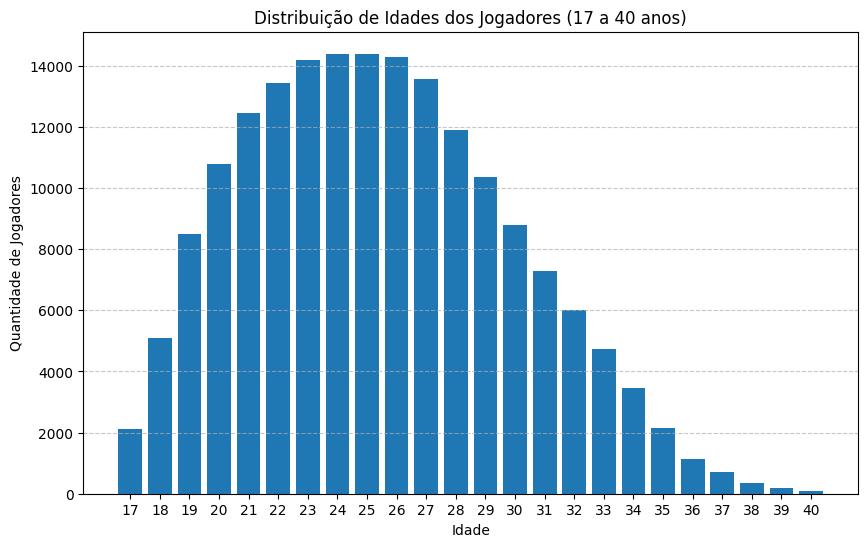

In [28]:
import matplotlib.pyplot as plt

df_idade_filtrada = df_idade[df_idade['idade'].between(17, 40)]

plt.figure(figsize=(10, 6))
plt.bar(df_idade_filtrada['idade'], df_idade_filtrada['Quantidade_jogadores'])
plt.xlabel('Idade')
plt.ylabel('Quantidade de Jogadores')
plt.title('Distribuição de Idades dos Jogadores (17 a 40 anos)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(df_idade_filtrada['idade'])
plt.show()

In [29]:
df_idade.to_csv("distribuicao_idade_jogadores.csv", index=False)
print("DataFrame df_idade salvo como distribuicao_idade_jogadores.csv")

DataFrame df_idade salvo como distribuicao_idade_jogadores.csv


In [30]:
import seaborn as sns

df_hw = pd.read_sql_query("SELECT height, weight from Player;", conn)

print(df_hw.describe())

             height        weight
count  11060.000000  11060.000000
mean     181.867445    168.380289
std        6.369201     14.990217
min      157.480000    117.000000
25%      177.800000    159.000000
50%      182.880000    168.000000
75%      185.420000    179.000000
max      208.280000    243.000000


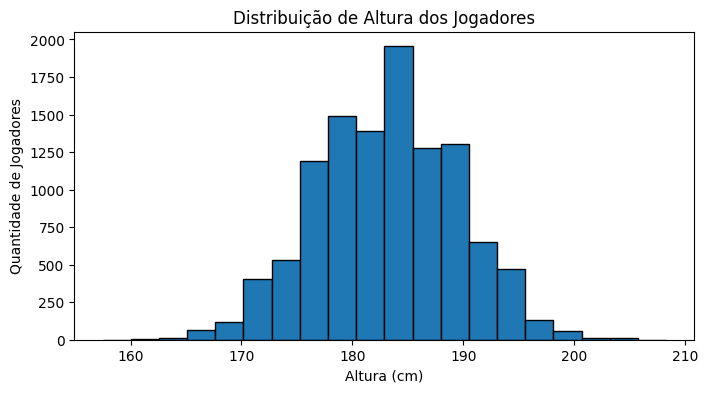

In [31]:
plt.figure(figsize=(8, 4))
plt.hist(df_hw['height'], bins=20, edgecolor='black')
plt.title('Distribuição de Altura dos Jogadores')
plt.xlabel('Altura (cm)')
plt.ylabel('Quantidade de Jogadores')
plt.show()

In [32]:
df_hw['weight'] = df_hw['weight'] * 0.453592

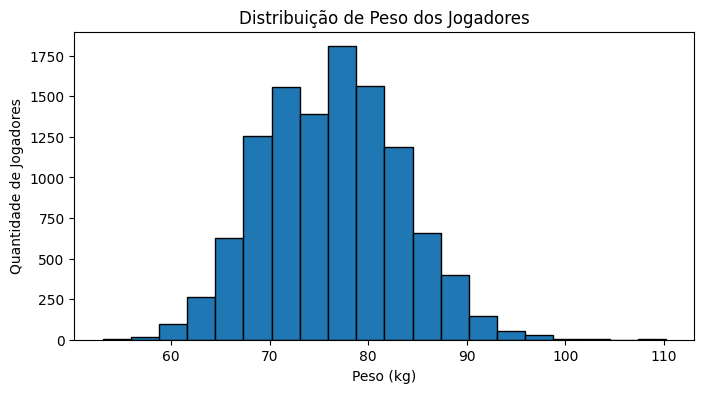

In [33]:
plt.figure(figsize=(8, 4))
plt.hist(df_hw['weight'], bins=20, edgecolor='black')
plt.title('Distribuição de Peso dos Jogadores')
plt.xlabel('Peso (kg)')
plt.ylabel('Quantidade de Jogadores')
plt.show()

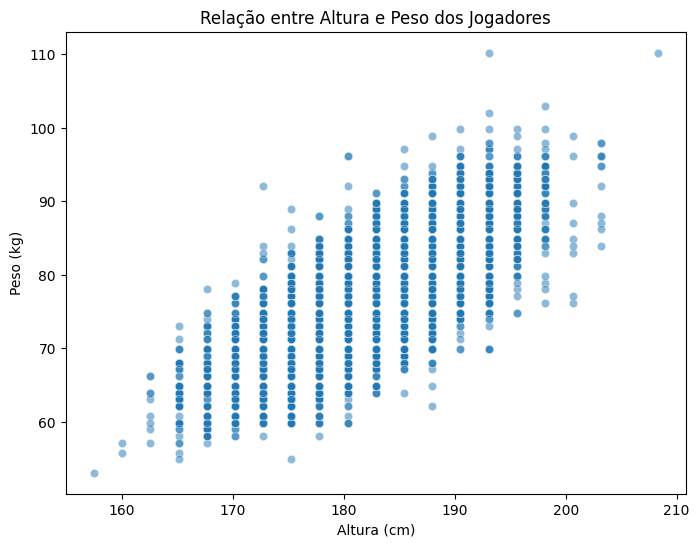

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x= 'height', y= 'weight', data = df_hw, alpha=0.5)
plt.title("Relação entre Altura e Peso dos Jogadores")
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.show()

In [35]:
correlation = df_hw["height"].corr(df_hw["weight"])
print(f"Coeficiente de Correlação entre Altura e Peso: {correlation:.2f}")

Coeficiente de Correlação entre Altura e Peso: 0.77


In [36]:
df_hw.isnull().sum()

,0
height,0
weight,0


In [37]:
df_hw.to_csv("altura_peso_jogadores.csv", index=False)
print("DataFrame df_hw salvo como altura_peso_jogadores.csv")

DataFrame df_hw salvo como altura_peso_jogadores.csv


In [38]:
df_PlayerAttributes = pd.read_sql_query("Select player_api_id, date, overall_rating from Player_Attributes;", conn)
df_PlayerAttributes['date'] = pd.to_datetime(df_PlayerAttributes['date'], errors='coerce')

df_filtra_anos = df_PlayerAttributes[df_PlayerAttributes['date'].dt.year.isin([2007, 2016])]

#Definir o período que o Overall vai ser analisado
start_date = pd.to_datetime('2007-08-01')
end_date = pd.to_datetime('2016-05-31')

df_periodo = df_PlayerAttributes[(df_PlayerAttributes['date'] >= start_date) & (df_PlayerAttributes['date'] <= end_date)]

df_periodo = df_periodo.dropna(subset=['date'])

# 1. Ordenar os dados por jogador e data
df_periodo_ordenado = df_periodo.sort_values(by=['player_api_id', 'date'], ascending=[True, True])

# 2. Agrupar por jogador e pegar o primeiro e último 'overall_rating'
df_evolucao = df_periodo_ordenado.groupby('player_api_id')['overall_rating'].agg(['first', 'last']).reset_index()

# 3. Renomear as colunas para maior clareza
df_evolucao.rename(columns={'first': 'rating_inicial', 'last': 'rating_final'}, inplace=True)

# 4. Calcular a evolução (diferença entre o rating final e inicial)
df_evolucao['evolucao'] = df_evolucao['rating_final'] - df_evolucao['rating_inicial']

# Agora, df_evolucao contém o rating inicial, o rating final e a evolução para cada jogador
print(df_evolucao.head())

   player_api_id  rating_inicial  rating_final  evolucao
0           2625            63.0          61.0      -2.0
1           2752            62.0          72.0      10.0
2           2768            56.0          74.0      18.0
3           2770            73.0          69.0      -4.0
4           2790            72.0          67.0      -5.0


In [39]:
melhores_rating_inicial = df_evolucao.sort_values(by='rating_inicial', ascending=False).head(5)
print("\n5 Melhores Rating Inicial (2007):")
print(melhores_rating_inicial)


5 Melhores Rating Inicial (2007):
      player_api_id  rating_inicial  rating_final  evolucao
1979          30893            91.0          93.0       2.0
1911          30743            91.0          78.0     -13.0
1894          30723            91.0          73.0     -18.0
1890          30717            91.0          84.0      -7.0
1830          30626            91.0          79.0     -12.0


In [40]:
piores_rating_inicial = df_evolucao.sort_values(by='rating_inicial', ascending=True).head(5)
print("\n5 Piores Rating Inicial (2007):")
print(piores_rating_inicial)


5 Piores Rating Inicial (2007):
      player_api_id  rating_inicial  rating_final  evolucao
4230          41841            33.0          69.0      36.0
4156          41496            35.0          65.0      30.0
6221         127644            35.0          63.0      28.0
4698          47341            36.0          68.0      32.0
7064         166963            37.0          65.0      28.0


In [41]:
melhores_rating_final = df_evolucao.sort_values(by='rating_final', ascending=False).head(5)
print("\n5 Melhores Rating Final (2016):")
print(melhores_rating_final)


5 Melhores Rating Final (2016):
      player_api_id  rating_inicial  rating_final  evolucao
2038          30981            86.0          94.0       8.0
1979          30893            91.0          93.0       2.0
3910          40636            72.0          90.0      18.0
400           19533            73.0          90.0      17.0
1495          27299            80.0          90.0      10.0


In [42]:
piores_rating_final = df_evolucao.sort_values(by='rating_final', ascending=True).head(5)
print("\n5 Piores Rating Final (2016):")
print(piores_rating_final)


5 Piores Rating Final (2016):
      player_api_id  rating_inicial  rating_final  evolucao
4894          67396            44.0          42.0      -2.0
471           22343            46.0          46.0       0.0
5960         113186            49.0          46.0      -3.0
5776         107283            46.0          46.0       0.0
6210         127141            45.0          47.0       2.0


In [43]:
melhor_evolucao = df_evolucao.sort_values(by='evolucao', ascending=False).head(5)
print("\n5 Melhores Evoluções:")
print(melhor_evolucao)


5 Melhores Evoluções:
      player_api_id  rating_inicial  rating_final  evolucao
6277         129944            44.0          86.0      42.0
5780         107417            51.0          88.0      37.0
4139          41433            46.0          83.0      37.0
6080         115591            45.0          82.0      37.0
7488         181297            43.0          80.0      37.0


In [44]:
pior_evolucao = df_evolucao.sort_values(by='evolucao', ascending=True).head(5)
print("\n5 Piores Evoluções:")
print(pior_evolucao)


5 Piores Evoluções:
      player_api_id  rating_inicial  rating_final  evolucao
2310          32868            79.0          54.0     -25.0
913           24978            84.0          62.0     -22.0
989           25584            77.0          55.0     -22.0
1942          30836            83.0          62.0     -21.0
2636          34319            79.0          59.0     -20.0


In [45]:
df_nomes_jogadores = pd.read_sql_query("SELECT player_api_id, player_name from Player;", conn)

df_evolucao_nome = df_evolucao.merge(df_nomes_jogadores, on='player_api_id', how='left') #Junta as informações de evolução com o nome do jogador

df_evolucao_nome = df_evolucao_nome[[
    'player_api_id', 'player_name', 'rating_inicial', 'rating_final', 'evolucao'
]]

print(df_evolucao_nome.head())

   player_api_id        player_name  rating_inicial  rating_final  evolucao
0           2625  Patryk Rachwal,18            63.0          61.0      -2.0
1           2752        Diego Mainz            62.0          72.0      10.0
2           2768        Jose Dorado            56.0          74.0      18.0
3           2770   Ignacio Gonzalez            73.0          69.0      -4.0
4           2790        Alberto Rey            72.0          67.0      -5.0


In [46]:
melhores_rating_inicial_nome = melhores_rating_inicial.merge(df_nomes_jogadores, on='player_api_id', how='left')
melhores_rating_inicial_nome = melhores_rating_inicial_nome[[
    'player_api_id', 'player_name', 'rating_inicial', 'rating_final', 'evolucao'
]]

print("\n5 Melhores Rating Inicial (2007) com Nome:")
print(melhores_rating_inicial_nome)


5 Melhores Rating Inicial (2007) com Nome:
   player_api_id        player_name  rating_inicial  rating_final  evolucao
0          30893  Cristiano Ronaldo            91.0          93.0       2.0
1          30743         Ronaldinho            91.0          78.0     -13.0
2          30723   Alessandro Nesta            91.0          73.0     -18.0
3          30717   Gianluigi Buffon            91.0          84.0      -7.0
4          30626      Thierry Henry            91.0          79.0     -12.0


In [47]:
piores_rating_inicial_nome = piores_rating_inicial.merge(df_nomes_jogadores, on='player_api_id', how='left')
piores_rating_inicial_nome = piores_rating_inicial_nome[[
    'player_api_id', 'player_name', 'rating_inicial', 'rating_final', 'evolucao'
]]

print("\n5 Piores Rating Inicial (2007) com Nome:")
print(piores_rating_inicial_nome)


5 Piores Rating Inicial (2007) com Nome:
   player_api_id            player_name  rating_inicial  rating_final  \
0          41841  Francesco Della Rocca            33.0          69.0   
1          41496         Nicola Madonna            35.0          65.0   
2         127644          James Vincent            35.0          63.0   
3          47341          Nick Blackman            36.0          68.0   
4         166963           Graham Carey            37.0          65.0   

   evolucao  
0      36.0  
1      30.0  
2      28.0  
3      32.0  
4      28.0  


In [48]:
melhores_rating_final_nome = melhores_rating_final.merge(df_nomes_jogadores, on='player_api_id', how='left')
melhores_rating_final_nome = melhores_rating_final_nome[[
    'player_api_id', 'player_name', 'rating_inicial', 'rating_final', 'evolucao'
]]

print("\n5 Melhores Rating Final (2016) com Nome:")
print(melhores_rating_final_nome)


5 Melhores Rating Final (2016) com Nome:
   player_api_id        player_name  rating_inicial  rating_final  evolucao
0          30981       Lionel Messi            86.0          94.0       8.0
1          30893  Cristiano Ronaldo            91.0          93.0       2.0
2          40636        Luis Suarez            72.0          90.0      18.0
3          19533             Neymar            73.0          90.0      17.0
4          27299       Manuel Neuer            80.0          90.0      10.0


In [49]:
piores_rating_final_nome = piores_rating_final.merge(df_nomes_jogadores, on='player_api_id', how='left')
piores_rating_final_nome = piores_rating_final_nome[[
    'player_api_id', 'player_name', 'rating_inicial', 'rating_final', 'evolucao'
]]

print("\n5 Piores Rating Final (2016) com Nome:")
print(piores_rating_final_nome)


5 Piores Rating Final (2016) com Nome:
   player_api_id         player_name  rating_inicial  rating_final  evolucao
0          67396     Frederic Schaub            44.0          42.0      -2.0
1          22343    Benjamin Fischer            46.0          46.0       0.0
2         113186      Emir Sinanovic            49.0          46.0      -3.0
3         107283         Liam Hughes            46.0          46.0       0.0
4         127141  Jordan Kirkpatrick            45.0          47.0       2.0


In [50]:
melhor_evolucao_com_nome = melhor_evolucao.merge(df_nomes_jogadores, on='player_api_id', how='left')
melhor_evolucao_com_nome = melhor_evolucao_com_nome[[
    'player_api_id', 'player_name', 'rating_inicial', 'rating_final', 'evolucao'
]]

print("\n5 Melhores Evoluções com Nome:")
print(melhor_evolucao_com_nome)


5 Melhores Evoluções com Nome:
   player_api_id        player_name  rating_inicial  rating_final  evolucao
0         129944         Marco Reus            44.0          86.0      42.0
1         107417        Eden Hazard            51.0          88.0      37.0
2          41433   Radja Nainggolan            46.0          83.0      37.0
3         115591  Ricardo Rodriguez            45.0          82.0      37.0
4         181297    Oscar de Marcos            43.0          80.0      37.0


In [51]:
pior_evolucao_com_nome = pior_evolucao.merge(df_nomes_jogadores, on='player_api_id', how='left')
pior_evolucao_com_nome = pior_evolucao_com_nome[[
    'player_api_id', 'player_name', 'rating_inicial', 'rating_final', 'evolucao'
]]

print("\n5 Piores Evoluções com Nome:")
print(pior_evolucao_com_nome)


5 Piores Evoluções com Nome:
   player_api_id         player_name  rating_inicial  rating_final  evolucao
0          32868    Julien Rodriguez            79.0          54.0     -25.0
1          24978      Barry Ferguson            84.0          62.0     -22.0
2          25584             Cribari            77.0          55.0     -22.0
3          30836  Scott Chipperfield            83.0          62.0     -21.0
4          34319  Aimo Stefano Diana            79.0          59.0     -20.0


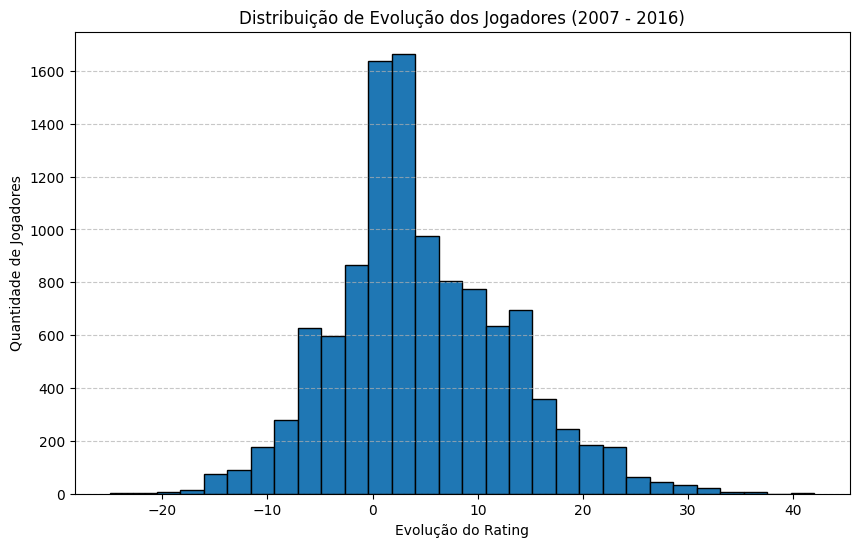

In [52]:
plt.figure(figsize=(10, 6))
plt.hist(df_evolucao_nome['evolucao'], bins=30, edgecolor='black')
plt.title('Distribuição de Evolução dos Jogadores (2007 - 2016)')
plt.xlabel('Evolução do Rating')
plt.ylabel('Quantidade de Jogadores')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [53]:
df_evolucao_nome.to_csv("evolucao_jogadores.csv", index=False)
print("DataFrame df_evolucao_nome salvo como evolucao_jogadores.csv")


DataFrame df_evolucao_nome salvo como evolucao_jogadores.csv


In [54]:
df_evolucao_final_completo = df_evolucao_nome[['player_api_id', 'evolucao']]

df_overall = df_overall.merge(df_evolucao_final_completo, on='player_api_id', how='left')

print(df_overall.head())

   player_api_id        player_name  altura  peso_incial  peso_final  \
0           2625  Patryk Rachwal,18  175.26          154         154   
1           2752        Diego Mainz  187.96          174         174   
2           2768        Jose Dorado  180.34          154         154   
3           2770   Ignacio Gonzalez  180.34          161         161   
4           2790        Alberto Rey  175.26          163         163   

  primeira_data  primeiro_overall ultima_data  ultimo_overall  idade_inicial  \
0    2007-02-22              63.0  2015-01-16            61.0             26   
1    2007-02-22              62.0  2015-10-16            72.0             24   
2    2007-02-22              56.0  2016-03-17            74.0             24   
3    2007-02-22              73.0  2013-07-05            69.0             24   
4    2007-02-22              68.0  2010-08-30            67.0             33   

   idade_final  evolucao  
0           33      -2.0  
1           32      10.0  
2    

In [55]:
df_overall.to_csv("overall_completo.csv", index=False)
print("DataFrame df_overall salvo como overall_completo.csv")

DataFrame df_overall salvo como overall_completo.csv


In [56]:
#---------------------------------------------------------------------------------------------------------------------------------------------

In [57]:
total_partidas = df_match['match_api_id'].count()
print(f"Total de partidas: {total_partidas}")

Total de partidas: 25979


In [58]:
df_league_renomeado = df_league.rename(columns={'id': 'league_id'})
df_league_renomeado.head()

,league_id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [59]:
df_match_league = df_match.merge(df_league_renomeado, on='league_id', how='left')
print(df_match_league.head())
print(df_match_league.columns)

   id  country_id_x  league_id     season  stage                 date  \
0   1             1          1  2008/2009      1  2008-08-17 00:00:00   
1   2             1          1  2008/2009      1  2008-08-16 00:00:00   
2   3             1          1  2008/2009      1  2008-08-16 00:00:00   
3   4             1          1  2008/2009      1  2008-08-17 00:00:00   
4   5             1          1  2008/2009      1  2008-08-16 00:00:00   

   match_api_id  home_team_api_id  away_team_api_id  home_team_goal  ...  \
0        492473              9987              9993               1  ...   
1        492474             10000              9994               0  ...   
2        492475              9984              8635               0  ...   
3        492476              9991              9998               5  ...   
4        492477              7947              9985               1  ...   

    VCD   VCA   GBH   GBD   GBA   BSH   BSD   BSA  country_id_y  \
0  3.40  4.50  1.78  3.25  4.00  1.73

In [60]:
#renomeei a coluna para pradonizacao
df_match_league = df_match_league.rename(columns={'country_id_x': 'country_id'})

In [61]:
#remocao da coluna duplicada
df_match_league = df_match_league.drop(columns=['country_id_y'])

print(df_match_league.head())
print(df_match_league.columns)

   id  country_id  league_id     season  stage                 date  \
0   1           1          1  2008/2009      1  2008-08-17 00:00:00   
1   2           1          1  2008/2009      1  2008-08-16 00:00:00   
2   3           1          1  2008/2009      1  2008-08-16 00:00:00   
3   4           1          1  2008/2009      1  2008-08-17 00:00:00   
4   5           1          1  2008/2009      1  2008-08-16 00:00:00   

   match_api_id  home_team_api_id  away_team_api_id  home_team_goal  ...  \
0        492473              9987              9993               1  ...   
1        492474             10000              9994               0  ...   
2        492475              9984              8635               0  ...   
3        492476              9991              9998               5  ...   
4        492477              7947              9985               1  ...   

    VCH   VCD   VCA   GBH   GBD   GBA   BSH   BSD   BSA  \
0  1.65  3.40  4.50  1.78  3.25  4.00  1.73  3.40  4.20  

In [62]:
df_country_renomeado = df_country.rename(columns={'id': 'country_id'})
df_country_renomeado.head()

,country_id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [63]:
#Join para unir as tabelas league com a tabela country
df_match_league = df_match_league.merge(df_country_renomeado, on='country_id', how='left')
print(df_match_league.head())
print(df_match_league.columns)

   id  country_id  league_id     season  stage                 date  \
0   1           1          1  2008/2009      1  2008-08-17 00:00:00   
1   2           1          1  2008/2009      1  2008-08-16 00:00:00   
2   3           1          1  2008/2009      1  2008-08-16 00:00:00   
3   4           1          1  2008/2009      1  2008-08-17 00:00:00   
4   5           1          1  2008/2009      1  2008-08-16 00:00:00   

   match_api_id  home_team_api_id  away_team_api_id  home_team_goal  ...  \
0        492473              9987              9993               1  ...   
1        492474             10000              9994               0  ...   
2        492475              9984              8635               0  ...   
3        492476              9991              9998               5  ...   
4        492477              7947              9985               1  ...   

    VCD   VCA   GBH   GBD   GBA   BSH   BSD   BSA                  name_x  \
0  3.40  4.50  1.78  3.25  4.00  1.73  

In [64]:
#renomeei as colunas para melhor compreensao da tabela após o join
df_match_league = df_match_league.rename(columns={'name_x': 'league_name'})
df_match_league = df_match_league.rename(columns={'name_y': 'country_name'})

print(df_match_league.head())

   id  country_id  league_id     season  stage                 date  \
0   1           1          1  2008/2009      1  2008-08-17 00:00:00   
1   2           1          1  2008/2009      1  2008-08-16 00:00:00   
2   3           1          1  2008/2009      1  2008-08-16 00:00:00   
3   4           1          1  2008/2009      1  2008-08-17 00:00:00   
4   5           1          1  2008/2009      1  2008-08-16 00:00:00   

   match_api_id  home_team_api_id  away_team_api_id  home_team_goal  ...  \
0        492473              9987              9993               1  ...   
1        492474             10000              9994               0  ...   
2        492475              9984              8635               0  ...   
3        492476              9991              9998               5  ...   
4        492477              7947              9985               1  ...   

    VCD   VCA   GBH   GBD   GBA   BSH   BSD   BSA             league_name  \
0  3.40  4.50  1.78  3.25  4.00  1.73  

In [65]:
df_partidas_liga = df_match_league.groupby(['country_name', 'league_name']).size().reset_index(name='total_partidas')
df_partidas_liga = df_partidas_liga.sort_values(by='total_partidas', ascending=False)
print(df_partidas_liga)

   country_name               league_name  total_partidas
1       England    England Premier League            3040
2        France            France Ligue 1            3040
9         Spain           Spain LIGA BBVA            3040
4         Italy             Italy Serie A            3017
5   Netherlands    Netherlands Eredivisie            2448
3       Germany     Germany 1. Bundesliga            2448
7      Portugal  Portugal Liga ZON Sagres            2052
6        Poland        Poland Ekstraklasa            1920
8      Scotland   Scotland Premier League            1824
0       Belgium    Belgium Jupiler League            1728
10  Switzerland  Switzerland Super League            1422


/tmp/ipython-input-2656857419.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='league_name', y='total_partidas', data=df_partidas_liga, palette='viridis')


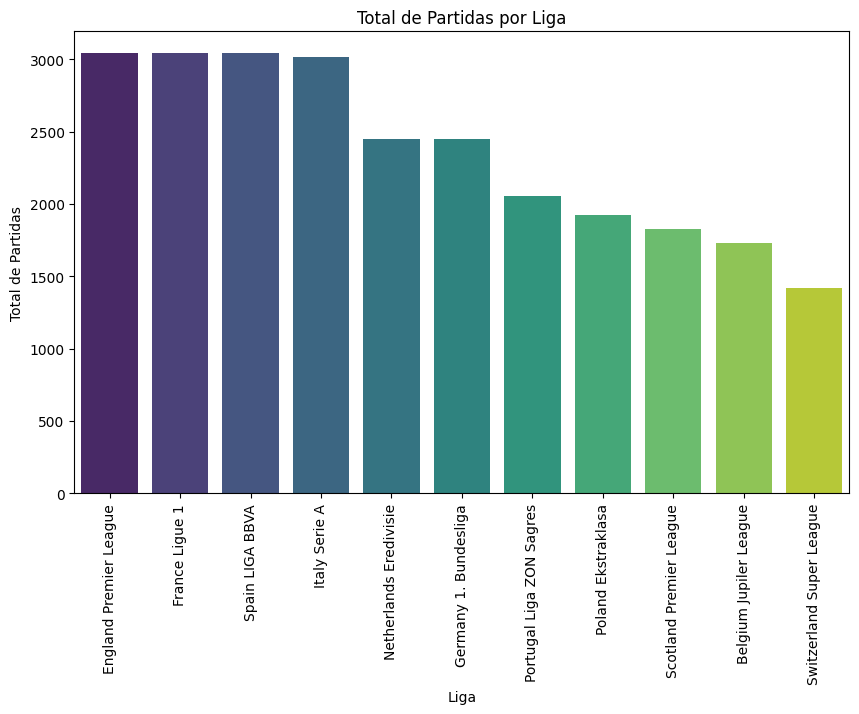

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(x='league_name', y='total_partidas', data=df_partidas_liga, palette='viridis')
plt.xticks(rotation=90)
plt.title('Total de Partidas por Liga')
plt.xlabel('Liga')
plt.ylabel('Total de Partidas')
plt.show()

In [67]:
df_match_league.to_csv('partidas_com_ligas_e_paises.csv', index=False)
print("DataFrame df_match_league salvo como partidas_com_ligas_e_paises.csv")

DataFrame df_match_league salvo como partidas_com_ligas_e_paises.csv


In [90]:
#Gols marcados jogando em casa
df_gols_casa = df_match.groupby(['season','home_team_api_id'])['home_team_goal'].sum().reset_index()
df_gols_casa.rename(columns={
    'home_team_api_id': 'team_api_id',
    'home_team_goal': 'goals'
}, inplace=True)
print("Gols Marcados por Times da Casa:")
print(df_gols_casa)

Gols Marcados por Times da Casa:
         season  team_api_id  goals
0     2008/2009         1601     13
1     2008/2009         1957     24
2     2008/2009         2182     22
3     2008/2009         2183     19
4     2008/2009         2186     12
...         ...          ...    ...
1476  2015/2016       158085     28
1477  2015/2016       177361     21
1478  2015/2016       188163     15
1479  2015/2016       208931     23
1480  2015/2016       274581     18

[1481 rows x 3 columns]


In [91]:
#gols marcados fora de casa
df_gols_fora = df_match.groupby(['season', 'away_team_api_id'])['away_team_goal'].sum().reset_index()
df_gols_fora.rename(columns={
    'away_team_api_id': 'team_api_id',
    'away_team_goal': 'goals'
}, inplace=True)
print("\nGols Marcados como Visitante:")
print(df_gols_fora)


Gols Marcados como Visitante:
         season  team_api_id  goals
0     2008/2009         1601      9
1     2008/2009         1957      4
2     2008/2009         2182     29
3     2008/2009         2183     21
4     2008/2009         2186     12
...         ...          ...    ...
1476  2015/2016       158085     19
1477  2015/2016       177361     12
1478  2015/2016       188163     19
1479  2015/2016       208931     14
1480  2015/2016       274581     21

[1481 rows x 3 columns]


In [93]:
#Todos os gols Somados

df_todos_gols = pd.concat([df_gols_casa, df_gols_fora])

df_todos_gols_time = df_todos_gols.groupby(['season', 'team_api_id'])['goals'].sum().reset_index()

df_todos_gols_time.rename(columns={'goals': 'total_gols_scored'}, inplace=True)

print(df_todos_gols_time.head())

      season  team_api_id  total_gols_scored
0  2008/2009         1601                 22
1  2008/2009         1957                 28
2  2008/2009         2182                 51
3  2008/2009         2183                 40
4  2008/2009         2186                 24


In [95]:
df_nome_times = pd.read_sql_query("SELECT team_api_id, team_long_name from Team;", conn)

df_gols_casa_nome = df_gols_casa.merge(df_nome_times, on='team_api_id', how='left')

df_gols_casa_nome = df_gols_casa_nome[['season', 'team_api_id', 'team_long_name', 'goals']]

print(df_gols_casa_nome)

         season  team_api_id                team_long_name  goals
0     2008/2009         1601                  Ruch Chorzów     13
1     2008/2009         1957         Jagiellonia Białystok     24
2     2008/2009         2182                   Lech Poznań     22
3     2008/2009         2183                   P. Warszawa     19
4     2008/2009         2186                      Cracovia     12
...         ...          ...                           ...    ...
1476  2015/2016       158085                     FC Arouca     28
1477  2015/2016       177361  Termalica Bruk-Bet Nieciecza     21
1478  2015/2016       188163                       Tondela     15
1479  2015/2016       208931                         Carpi     23
1480  2015/2016       274581          Royal Excel Mouscron     18

[1481 rows x 4 columns]


In [96]:
df_gols_fora_nome = df_gols_fora.merge(df_nome_times, on='team_api_id', how='left')

df_gols_fora_nome = df_gols_fora_nome[['season','team_api_id', 'team_long_name', 'goals']]

print(df_gols_fora_nome)

         season  team_api_id                team_long_name  goals
0     2008/2009         1601                  Ruch Chorzów      9
1     2008/2009         1957         Jagiellonia Białystok      4
2     2008/2009         2182                   Lech Poznań     29
3     2008/2009         2183                   P. Warszawa     21
4     2008/2009         2186                      Cracovia     12
...         ...          ...                           ...    ...
1476  2015/2016       158085                     FC Arouca     19
1477  2015/2016       177361  Termalica Bruk-Bet Nieciecza     12
1478  2015/2016       188163                       Tondela     19
1479  2015/2016       208931                         Carpi     14
1480  2015/2016       274581          Royal Excel Mouscron     21

[1481 rows x 4 columns]


In [97]:
df_todos_gols_time_nome = df_todos_gols_time.merge(df_nome_times, on='team_api_id', how='left')

df_todos_gols_time_nome = df_todos_gols_time_nome[['season','team_api_id', 'team_long_name', 'total_gols_scored']]

print(df_todos_gols_time_nome)

         season  team_api_id                team_long_name  total_gols_scored
0     2008/2009         1601                  Ruch Chorzów                 22
1     2008/2009         1957         Jagiellonia Białystok                 28
2     2008/2009         2182                   Lech Poznań                 51
3     2008/2009         2183                   P. Warszawa                 40
4     2008/2009         2186                      Cracovia                 24
...         ...          ...                           ...                ...
1476  2015/2016       158085                     FC Arouca                 47
1477  2015/2016       177361  Termalica Bruk-Bet Nieciecza                 33
1478  2015/2016       188163                       Tondela                 34
1479  2015/2016       208931                         Carpi                 37
1480  2015/2016       274581          Royal Excel Mouscron                 39

[1481 rows x 4 columns]


In [98]:
times_mais_gols_casa = df_gols_casa_nome.sort_values(by='goals', ascending=False).head(10)
print("\nTimes com Mais Gols na Casa:")
print(times_mais_gols_casa)


Times com Mais Gols na Casa:
         season  team_api_id  team_long_name  goals
639   2011/2012         8634    FC Barcelona     73
638   2011/2012         8633  Real Madrid CF     70
1372  2015/2016         8633  Real Madrid CF     70
224   2009/2010         8455         Chelsea     68
822   2012/2013         8633  Real Madrid CF     67
1373  2015/2016         8634    FC Barcelona     67
1185  2014/2015         8633  Real Madrid CF     65
1002  2013/2014         8634    FC Barcelona     64
1186  2014/2015         8634    FC Barcelona     64
253   2009/2010         8593            Ajax     64


In [99]:
times_mais_gols_fora = df_gols_fora_nome.sort_values(by='goals', ascending=False).head(10)
print("\nTimes com Mais Gols Fora:")
print(times_mais_gols_fora)


Times com Mais Gols Fora:
         season  team_api_id    team_long_name  goals
1185  2014/2015         8633    Real Madrid CF     53
1063  2013/2014         9925            Celtic     52
823   2012/2013         8634      FC Barcelona     52
638   2011/2012         8633    Real Madrid CF     51
446   2010/2011         8634      FC Barcelona     49
1007  2013/2014         8650         Liverpool     48
1377  2015/2016         8640               PSV     47
1035  2013/2014         9823  FC Bayern Munich     46
1186  2014/2015         8634      FC Barcelona     46
1373  2015/2016         8634      FC Barcelona     45


In [100]:
times_mais_gols_total = df_todos_gols_time_nome.sort_values(by='total_gols_scored', ascending=False).head(10)
print("\nTimes com Mais Gols Total:")
print(times_mais_gols_total)


Times com Mais Gols Total:
         season  team_api_id  team_long_name  total_gols_scored
638   2011/2012         8633  Real Madrid CF                121
1185  2014/2015         8633  Real Madrid CF                118
823   2012/2013         8634    FC Barcelona                115
639   2011/2012         8634    FC Barcelona                114
1373  2015/2016         8634    FC Barcelona                112
1186  2014/2015         8634    FC Barcelona                110
1372  2015/2016         8633  Real Madrid CF                110
253   2009/2010         8593            Ajax                106
76    2008/2009         8634    FC Barcelona                105
1001  2013/2014         8633  Real Madrid CF                104


In [101]:
times_menos_gols_casa = df_gols_casa_nome.sort_values(by='goals', ascending=True).head(10)
print("\nTimes com Menos Gols na Casa:")
print(times_menos_gols_casa)


Times com Menos Gols na Casa:
         season  team_api_id        team_long_name  goals
991   2013/2014         8573           KV Oostende      3
979   2013/2014         8475      Waasland-Beveren      4
1070  2013/2014         9989             Lierse SK      5
1071  2013/2014         9991              KAA Gent      6
125   2008/2009         9855      Grenoble Foot 38      9
580   2011/2012         8030         Lechia Gdańsk      9
943   2013/2014         7841            Rio Ave FC     10
782   2012/2013         8357  SpVgg Greuther Fürth     10
413   2010/2011         8467      St. Johnstone FC     10
565   2011/2012         2186              Cracovia     10


In [102]:
times_menos_gols_fora = df_gols_fora_nome.sort_values(by='goals', ascending=True).head(10)
print("\nTimes com Menos Gols Fora:")
print(times_menos_gols_fora)


Times com Menos Gols Fora:
         season  team_api_id         team_long_name  goals
1070  2013/2014         9989              Lierse SK      0
403   2010/2011         8322            Arka Gdynia      3
979   2013/2014         8475       Waasland-Beveren      3
16    2008/2009         8020          Polonia Bytom      3
11    2008/2009         7841             Rio Ave FC      4
991   2013/2014         8573            KV Oostende      4
1     2008/2009         1957  Jagiellonia Białystok      4
1071  2013/2014         9991               KAA Gent      5
1033  2013/2014         9807       CF Os Belenenses      5
1169  2014/2015         8550                FC Metz      5


In [103]:
times_menos_gols_total = df_todos_gols_time_nome.sort_values(by='total_gols_scored', ascending=True).head(10)
print("\nTimes com Menos Gols Total:")
print(times_menos_gols_total)


Times com Menos Gols Total:
         season  team_api_id      team_long_name  total_gols_scored
1070  2013/2014         9989           Lierse SK                  5
991   2013/2014         8573         KV Oostende                  7
979   2013/2014         8475    Waasland-Beveren                  7
1071  2013/2014         9991            KAA Gent                 11
18    2008/2009         8028       Piast Gliwice                 17
1033  2013/2014         9807    CF Os Belenenses                 19
524   2010/2011         9997   Sint-Truidense VV                 20
518   2010/2011         9986  Sporting Charleroi                 20
565   2011/2012         2186            Cracovia                 20
16    2008/2009         8020       Polonia Bytom                 20


In [104]:
total_partidas_equipe_casa = df_match.groupby('home_team_api_id').size().reset_index(name='total_partidas')
total_partidas_equipe_casa.rename(columns={'home_team_api_id': 'team_api_id'}, inplace=True)

print(total_partidas_equipe_casa)

     team_api_id  total_partidas
0           1601             120
1           1773              45
2           1957             120
3           2033              75
4           2182             120
..           ...             ...
294       158085              49
295       177361              15
296       188163              17
297       208931              19
298       274581              30

[299 rows x 2 columns]


In [81]:
total_partidas_equipe_fora = df_match.groupby('away_team_api_id').size().reset_index(name='total_partidas')
total_partidas_equipe_fora.rename(columns={'away_team_api_id': 'team_api_id'}, inplace=True)

print(total_partidas_equipe_fora)

     team_api_id  total_partidas
0           1601             120
1           1773              45
2           1957             120
3           2033              75
4           2182             120
..           ...             ...
294       158085              49
295       177361              15
296       188163              17
297       208931              19
298       274581              30

[299 rows x 2 columns]


In [82]:
total_partidas_casa_fora = pd.concat([total_partidas_equipe_casa, total_partidas_equipe_fora])

total_partidas_casa_fora = total_partidas_casa_fora.groupby('team_api_id')['total_partidas'].sum().reset_index()

print(total_partidas_casa_fora)

     team_api_id  total_partidas
0           1601             240
1           1773              90
2           1957             240
3           2033             150
4           2182             240
..           ...             ...
294       158085              98
295       177361              30
296       188163              34
297       208931              38
298       274581              60

[299 rows x 2 columns]


In [83]:
df_partidas_nome_time = total_partidas_casa_fora.merge(df_nome_times, on='team_api_id', how='left')

df_partidas_nome_time = df_partidas_nome_time[['team_api_id', 'team_long_name', 'total_partidas']]

print(df_partidas_nome_time)

     team_api_id                team_long_name  total_partidas
0           1601                  Ruch Chorzów             240
1           1773           Oud-Heverlee Leuven              90
2           1957         Jagiellonia Białystok             240
3           2033                S.C. Olhanense             150
4           2182                   Lech Poznań             240
..           ...                           ...             ...
294       158085                     FC Arouca              98
295       177361  Termalica Bruk-Bet Nieciecza              30
296       188163                       Tondela              34
297       208931                         Carpi              38
298       274581          Royal Excel Mouscron              60

[299 rows x 3 columns]


In [84]:
df_mais_jogos = df_partidas_nome_time.sort_values(by='total_partidas', ascending=False).head(10)
print("\nTimes com Mais Partidas:")
print(df_mais_jogos)


Times com Mais Partidas:
     team_api_id           team_long_name  total_partidas
263        10194               Stoke City             304
238         9941              Toulouse FC             304
237         9938            Dundee United             304
67          8302               Sevilla FC             304
68          8305                Getafe CF             304
70          8315  Athletic Club de Bilbao             304
234         9927               Motherwell             304
228         9906          Atlético Madrid             304
233         9925                   Celtic             304
100         8485                 Aberdeen             304


In [85]:
df_menos_jogos = df_partidas_nome_time.sort_values(by='total_partidas', ascending=True).head(10)
print("\nTimes com Menos Partidas:")
print(df_menos_jogos)


Times com Menos Partidas:
     team_api_id                team_long_name  total_partidas
8           4064                      Feirense              30
36          7992                      Trofense              30
268        10213                       Amadora              30
171         9765                  Portimonense              30
12          6351                     KAS Eupen              30
295       177361  Termalica Bruk-Bet Nieciecza              30
59          8234              FC Ingolstadt 04              34
34          7947                 FCV Dender EH              34
66          8295                 Karlsruher SC              34
63          8262               SV Darmstadt 98              34


In [105]:
df_media_gols_partida = df_todos_gols_time_nome.merge(df_partidas_nome_time, on='team_api_id', how='left')

df_media_gols_partida['media_gols_partida'] = df_media_gols_partida['total_gols_scored'] / df_media_gols_partida['total_partidas']

df_media_gols_partida = df_media_gols_partida.sort_values(by='media_gols_partida', ascending=False)

print(df_media_gols_partida)

         season  team_api_id      team_long_name_x  total_gols_scored  \
416   2010/2011         8483             Blackpool                 55   
13    2008/2009         7947         FCV Dender EH                 44   
1309  2015/2016         7896                Lugano                 46   
157   2008/2009         9996  Royal Excel Mouscron                 42   
1333  2015/2016         8306         UD Las Palmas                 45   
...         ...          ...                   ...                ...   
943   2013/2014         7841            Rio Ave FC                 21   
11    2008/2009         7841            Rio Ave FC                 20   
979   2013/2014         8475      Waasland-Beveren                  7   
1071  2013/2014         9991              KAA Gent                 11   
1070  2013/2014         9989             Lierse SK                  5   

          team_long_name_y  total_partidas  media_gols_partida  
416              Blackpool              38            1.44

In [106]:
df_media_gols_partida = df_media_gols_partida.rename(columns={'team_long_name_x': 'time'})

df_media_gols_partida = df_media_gols_partida.drop(columns=['team_long_name_y'])

print(df_media_gols_partida.head())

         season  team_api_id                  time  total_gols_scored  \
416   2010/2011         8483             Blackpool                 55   
13    2008/2009         7947         FCV Dender EH                 44   
1309  2015/2016         7896                Lugano                 46   
157   2008/2009         9996  Royal Excel Mouscron                 42   
1333  2015/2016         8306         UD Las Palmas                 45   

      total_partidas  media_gols_partida  
416               38            1.447368  
13                34            1.294118  
1309              36            1.277778  
157               34            1.235294  
1333              38            1.184211  


/tmp/ipython-input-1891174218.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= 'time', y='media_gols_partida', data=df_media_gols_partida.head(10), palette='viridis')


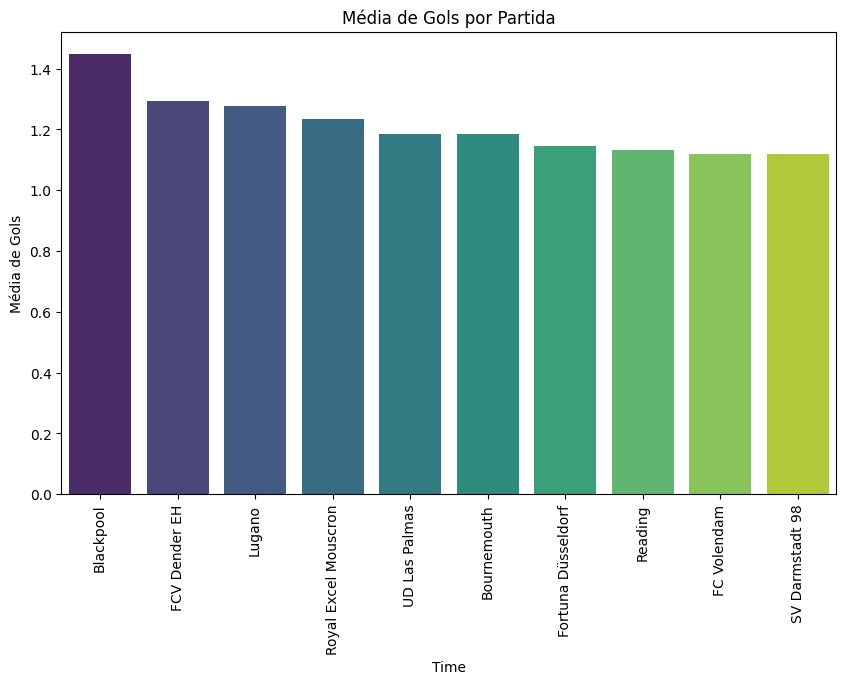

In [107]:
plt.figure(figsize=(10, 6))
sns.barplot(x= 'time', y='media_gols_partida', data=df_media_gols_partida.head(10), palette='viridis')
plt.xticks(rotation=90)
plt.title('Média de Gols por Partida')
plt.xlabel('Time')
plt.ylabel('Média de Gols')
plt.show()

In [108]:
df_media_gols_partida.to_csv("analise_gols_por_time.csv", index=False)
print("DataFrame df_media_gols_partida salvo como analise_gols_por_time.csv")


DataFrame df_media_gols_partida salvo como analise_gols_por_time.csv
